# CREDIT CARD FRAUD DETECTION

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cp
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
df = pd.read_csv('credcard3.csv')
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.shape


(10491, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10491 entries, 0 to 10490
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10491 non-null  int64  
 1   V1      10491 non-null  float64
 2   V2      10491 non-null  float64
 3   V3      10491 non-null  float64
 4   V4      10491 non-null  float64
 5   V5      10491 non-null  float64
 6   V6      10491 non-null  float64
 7   V7      10491 non-null  float64
 8   V8      10491 non-null  float64
 9   V9      10491 non-null  float64
 10  V10     10491 non-null  float64
 11  V11     10491 non-null  float64
 12  V12     10491 non-null  float64
 13  V13     10491 non-null  float64
 14  V14     10491 non-null  float64
 15  V15     10491 non-null  float64
 16  V16     10491 non-null  float64
 17  V17     10491 non-null  float64
 18  V18     10491 non-null  float64
 19  V19     10491 non-null  float64
 20  V20     10491 non-null  float64
 21  V21     10491 non-null  float64
 22

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,...,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000,10491.000000
mean,9472.190544,-0.454222,0.438557,0.533826,0.464548,-0.191963,0.061340,-0.329582,-0.035002,0.643702,...,-0.016090,-0.144849,-0.033621,0.015343,0.084983,0.105504,0.013273,0.006324,65.796451,0.050519
std,19394.814373,2.297478,1.729790,2.542681,1.784377,1.765150,1.376745,2.210922,1.921468,1.440935,...,1.234070,0.696724,0.586187,0.591544,0.452312,0.558986,0.500847,0.286053,188.896047,0.219025
min,0.000000,-30.552380,-34.607649,-31.103685,-4.657545,-32.092129,-23.496714,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2149.500000,-1.087894,-0.191599,0.313191,-0.561243,-0.683187,-0.673898,-0.588568,-0.190960,-0.046543,...,-0.265925,-0.547734,-0.179366,-0.336166,-0.163436,-0.324724,-0.084117,-0.016322,5.000000,0.000000
50%,5060.000000,-0.402047,0.328124,0.883988,0.275092,-0.168792,-0.178999,-0.084033,0.021027,0.744440,...,-0.115459,-0.130436,-0.046606,0.073344,0.119727,0.041961,-0.001313,0.016825,15.950000,0.000000
75%,10925.500000,1.143673,0.983170,1.568111,1.254270,0.369503,0.476546,0.457110,0.306939,1.476029,...,0.052682,0.254983,0.084441,0.407327,0.361234,0.469419,0.140174,0.085332,53.000000,0.000000
max,170348.000000,2.132386,22.057729,4.101716,12.114672,34.099309,21.393069,34.303177,20.007208,10.392889,...,27.202839,8.361985,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [9]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

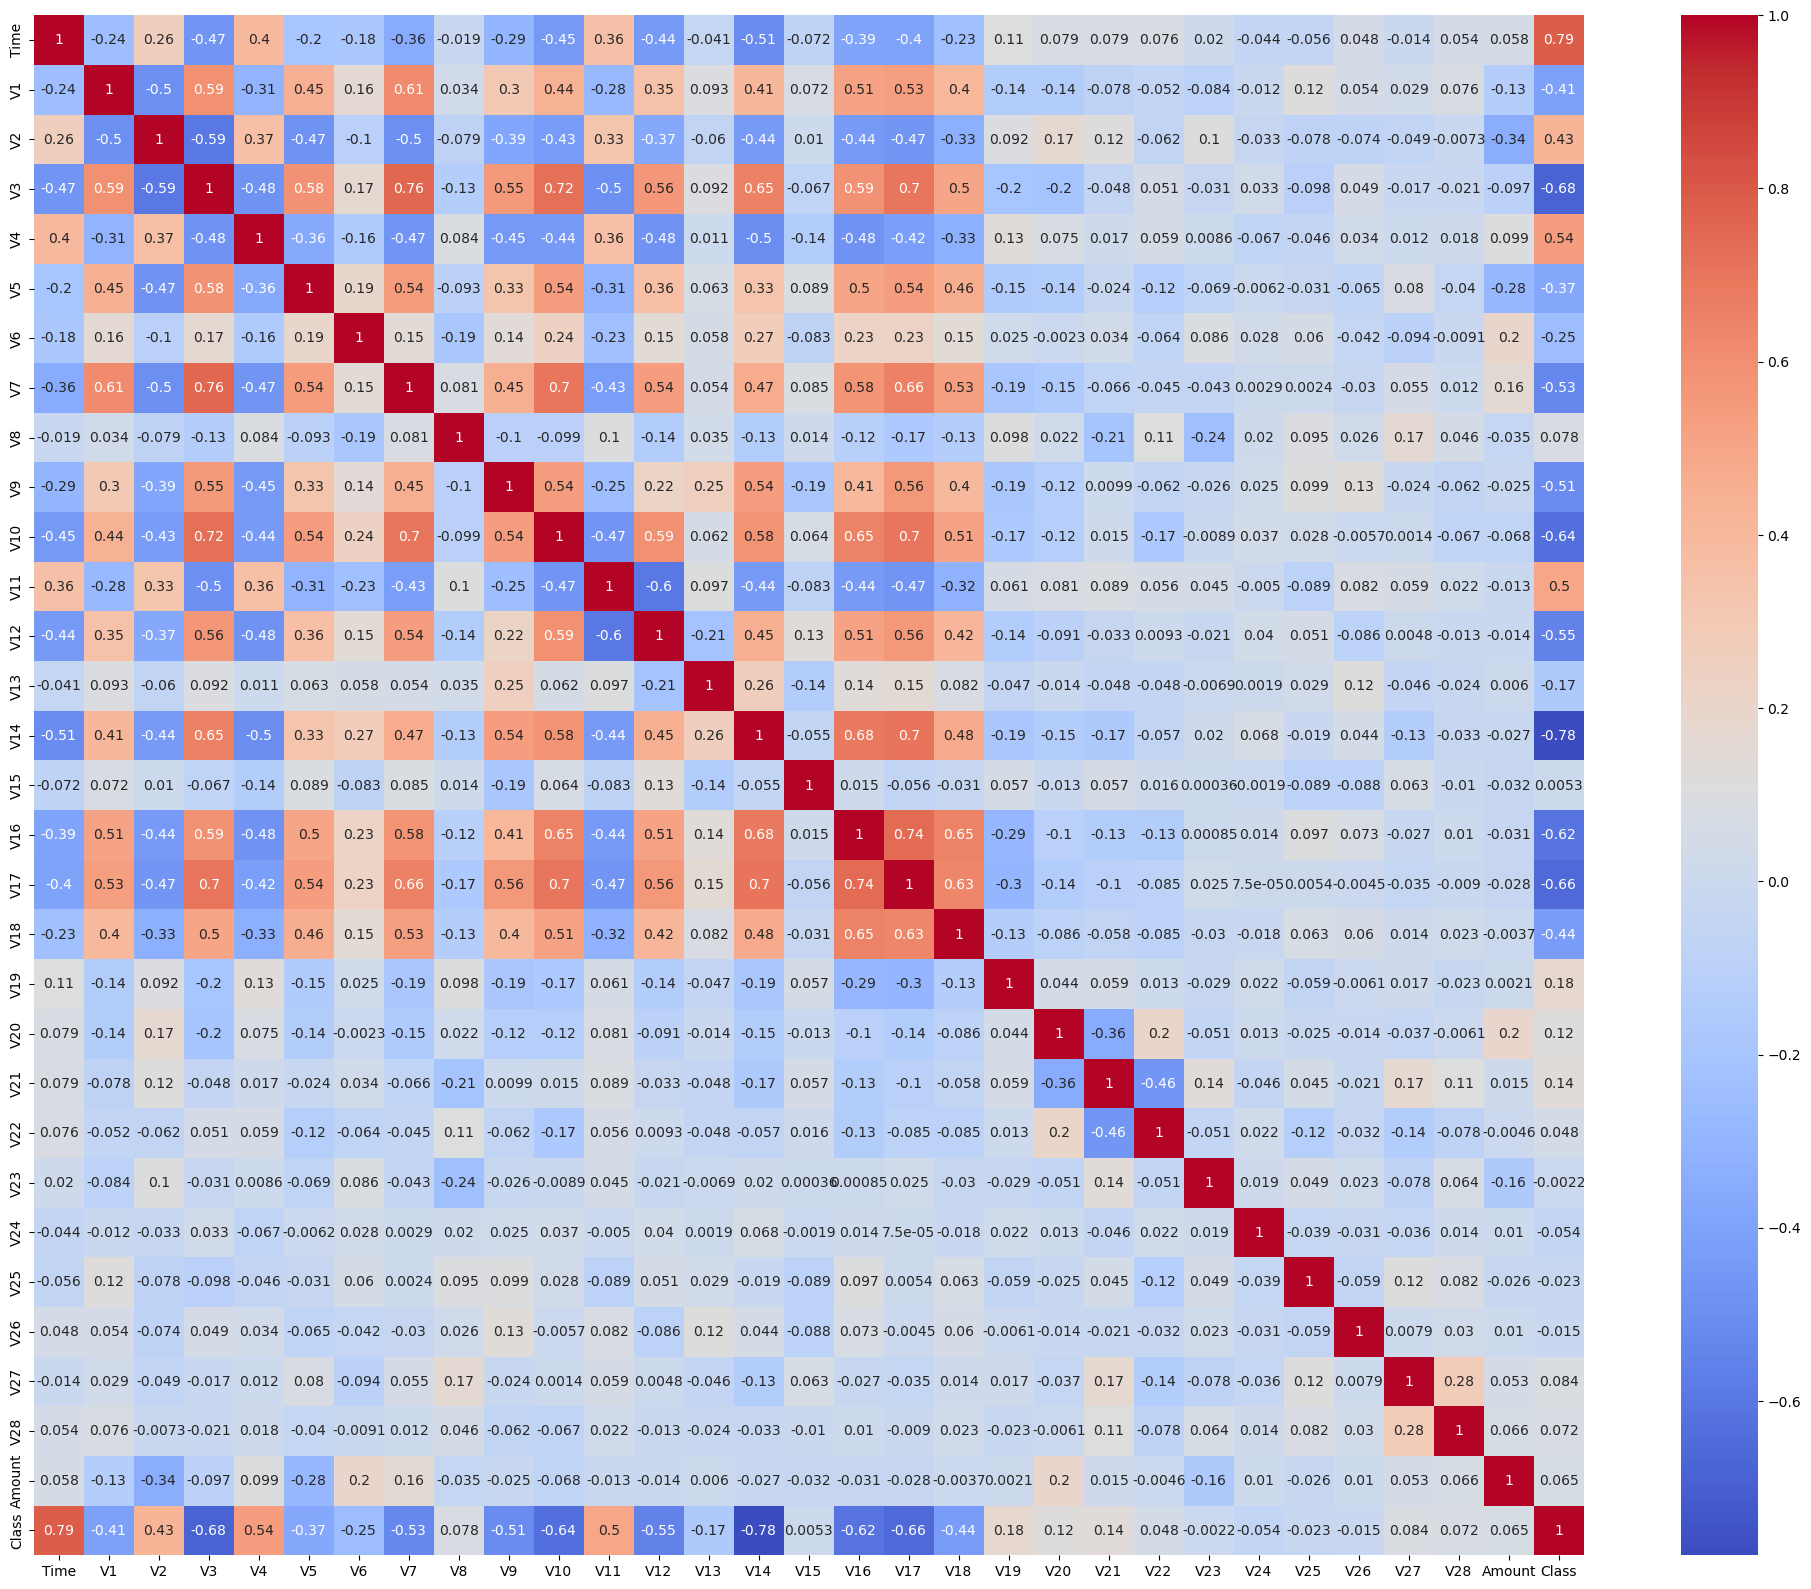

In [8]:
# Checking the correlation
corr = df.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(25,20))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [9]:
# Checking the class distribution of the target variable
df['Class'].value_counts()

0    9961
1     530
Name: Class, dtype: int64

Class
0    94.948051
1     5.051949
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

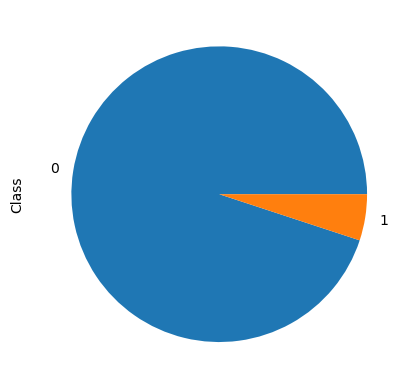

In [10]:
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

In [11]:
# Checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

94.94805071013249
5.051949289867506


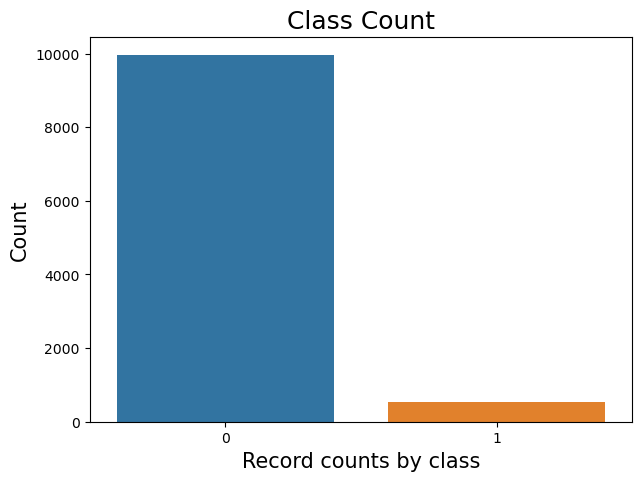

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [10]:
# As time is given in relative fashion, we are using pandas.
#Timedelta which Represents a duration, the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [11]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column 
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [12]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)

In [13]:
# Checking some rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

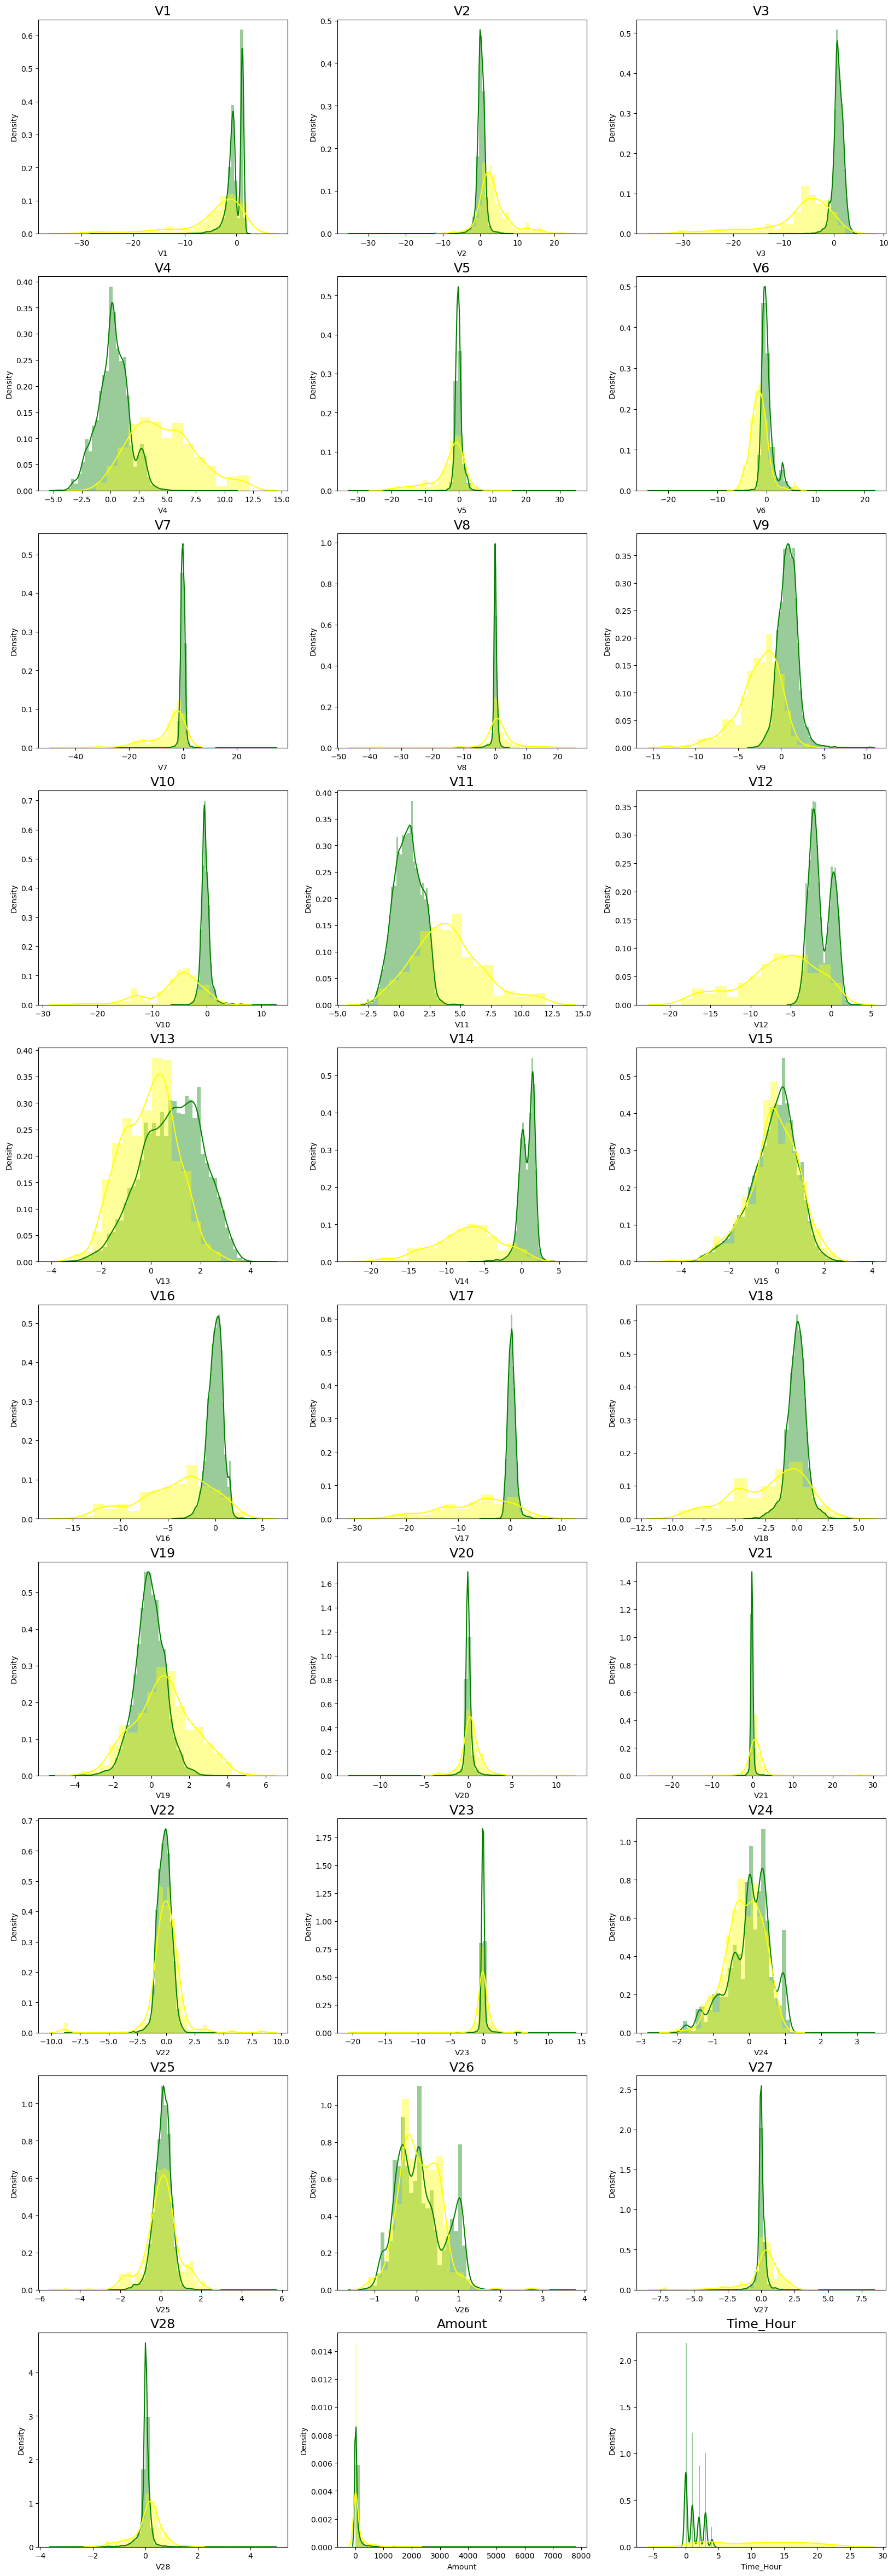

In [19]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='yellow')
  plt.title(col, fontsize=17)
plt.show()

In [16]:
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [17]:
x_scaler[-1]

array([ 1.0647826 , -0.16192399, -1.22603448, -0.03131662,  0.76094065,
       -0.11479405,  0.24996767, -0.01737411, -0.04571746, -0.21632263,
       -0.29147816,  1.07173429, -0.34754572, -1.02891204, -0.7195841 ,
        0.48567734,  0.39455131,  1.1947066 ,  0.72160202, -0.09437855,
       -0.12014477, -0.21571452, -0.06576938, -0.78713664,  0.50472735,
       -0.70688707, -0.02053659, -0.07562962, -0.12317653,  7.3220855 ])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# Logistic Regression From Scratch

In [23]:
class LogReg:
    def __init__(self,iterations=1000,learning_rate=0.001):
        self.iterations=iterations
        self.lr=learning_rate
        self.feature_names=[]
        self.target_names=[]
        self.num_samples=0
        self.num_features=0
        self.x=0
        self.y=0
        self.tn=0
        self.t0=0
        
    def fit(self,x,y):
        if isinstance(x,pd.DataFrame): 
            self.feature_names = [f for f in x.columns]
            self.x=np.array(x)
        else:
            self.x=x 
        if isinstance(y,pd.DataFrame): 
            self.target_names = [f for f in y.columns]
            self.y=np.array(y).reshape(-1)
        else:
            self.y=y 
        self.num_samples=len(x)
        self.num_features=x.shape[1]
        
        self.tn=np.zeros(self.num_features)
        
        for i in range(self.iterations):
            LR=np.dot(self.x, self.tn) + self.t0
            ht=self._sigmoid_function(LR)
            gtn,gt0=self._updations(ht,self.tn,self.t0)
            self.tn-=self.lr*gtn
            self.t0-=self.lr*gt0
        
    def _updations(self,ht,tn,t0):
        gtn=np.dot(self.x.T, (ht-self.y))
        gtn=(1/self.num_samples)*gtn
        gt0=np.sum(ht-self.y)
        gt0=(1/self.num_samples)*gt0
        return gtn,gt0
        
    def _sigmoid_function(self,x):
        output=1/(1+(np.exp(-x)))
        return output
    
    def _prediction(self,x):
        l=np.dot(x, self.tn) + self.t0
        h=self._sigmoid_function(l)
        if h>0.5:
            return 1
        elif h<0.5:
            return 0
    def predict(self,x):
        predicted_values=[]
        x=np.array(x)
        for i in x:
            predicted_values.append(self._prediction(i))
        return predicted_values

In [24]:
lr_model=LogReg(iterations=1000)
lr_model.fit(X_train,y_train)
yp=lr_model.predict(X_test)

print("Accuracy_score : {}".format(accuracy_score(y_test,yp)))
print("\nClassification_report : \n")
print(classification_report(y_test,yp))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,yp))

Accuracy_score : 0.9828489757027156

Classification_report : 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1985
           1       0.88      0.79      0.83       114

    accuracy                           0.98      2099
   macro avg       0.94      0.89      0.91      2099
weighted avg       0.98      0.98      0.98      2099

Confusion_Matrix : 

[[1973   12]
 [  24   90]]


# KNN From Scratch

In [26]:
import numpy as np
import pandas as pd
import statistics as stats


def distance (x,p): 
        l=list(map(lambda x,y:(x-y)**2,x,p))
        return np.sqrt(sum(l))

class KNearestNeighbours : 
    def __init__(self,n_neighbors=5): 
        self.n_neighbors=n_neighbors 
        self.feature_names=[]
        self.target_names=[]
        self.num_sampels=0
        self.x=0
        self.y=0
        self.predicted_values=0

    def fit(self,x,y): 
        if isinstance(x,pd.DataFrame): 
            self.feature_names = [f for f in x.columns]
            self.x=np.array(x)
        else:
            self.x=x 
        if isinstance(y,pd.DataFrame): 
            self.target_names = [f for f in y.columns]
            self.y=np.array(y).reshape(-1)
        else:
            self.y=y 
        
        if np.isnan(self.x).any() or np.isnan(self.y).any(): 
            raise Exception("model does not accept NAN values")
            
        self.num_sampels=len(x)
        
    def predict(self, p): 
        predict_values=[] 
        p=np.array(p) 
        for i in p: 
            p = dict(sorted(self._predictions(i).items())[0:self.n_neighbors]) 
            predict_values.append(stats.mode(p.values())) 
        self.predicted_values=predict_values
        return predict_values

    def _predictions(self,p):
        d=dict()
        for x,y in zip(self.x,self.y):
            dis=distance(x,p)
            d.update({dis:y})
        return d
    

In [27]:
[X_train,X_test,y_train,y_test] = train_test_split(X,y,test_size=0.3,random_state =100)
knn = KNearestNeighbours(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

print("Accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
print("\nClassification_report : \n")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,y_pred))

Accuracy_score : 0.98856416772554

Classification_report : 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2987
           1       1.00      0.78      0.87       161

    accuracy                           0.99      3148
   macro avg       0.99      0.89      0.93      3148
weighted avg       0.99      0.99      0.99      3148

Confusion_Matrix : 

[[2987    0]
 [  36  125]]


# SVM From Scratch

In [100]:
class SVM:
    def __init__(self):
        self.x=None
        self.y=None
        self.feature_names=None
        self.target_name=None
        self.w=None
        self.r=None
        self.psi=None
        
    def fit(self,X,y):
        if isinstance(X,pd.DataFrame): 
            self.feature_names = [f for f in X.columns]
            self.x=np.array(X)
        else:
            self.x=X
        if isinstance(y,pd.DataFrame): 
            self.target_names = [f for f in y.columns]
            self.y=np.array(y).reshape(-1,1)
        else:
            self.y=y
        self.w,self.r,self.psi=self._optimization(self.x,self.y,0.1)
            
    def _optimization(self,x,y,c):
        xrows=len(x)
        xcols=x.shape[1]
        D=np.diag(y)
        E=np.ones(xrows)
        W=cp.Variable(xcols)
        r=cp.Variable(1)
        psi=cp.Variable(xrows)
        obj=cp.Minimize(0.5*cp.norm(W)**2 + c*cp.sum(psi))
        constraints=[cp.matmul(D, x*W-r*E)+psi >=E , psi >= 0]
        opt=cp.Problem(obj, constraints)
        opt.solve()
        W=np.array(W.value)
        r=r.value
        psi=np.array(psi.value)
        return W,r,psi
    
    def _prediction(self,x):
        x=x.reshape(x.shape[0],1)
        p=(np.matmul(self.w,x) - self.r)
        if p>0:
            return 1
        elif p<0:
            return -1
        
    def predict(self,x):
        ypred=[]
        x=np.array(x)
        for i in range(0,x.shape[0]):
            ypred.append(self._prediction(x[i,:]))
        return ypred
    

In [106]:
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Splitting the dataset into X and y
df['Class'].replace(0,-1,inplace=True)
y= df['Class']
X = df.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

svm_model=SVM()
svm_model.fit(X_train,y_train)
yp=svm_model.predict(X_test)


print("Accuracy_score : {}".format(accuracy_score(y_test,yp)))
print("\nClassification_report : \n")
print(classification_report(y_test,yp))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,yp))

Accuracy_score : 0.9995235826584088

Classification_report : 

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1985
           1       0.99      1.00      1.00       114

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099

Confusion_Matrix : 

[[1984    1]
 [   0  114]]


# USING INBUILT FUNCTIONS:

# Logistic Regression Using Inbuilt Functions:

In [21]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

print("Accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
print("\nClassification_report : \n")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,y_pred))

Accuracy_score : 0.9985707479752263

Classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       0.98      0.99      0.99       114

    accuracy                           1.00      2099
   macro avg       0.99      1.00      0.99      2099
weighted avg       1.00      1.00      1.00      2099

Confusion_Matrix : 

[[1983    2]
 [   1  113]]


# KNN Using Inbuilt Functions

In [111]:
from sklearn.neighbors import KNeighborsClassifier

[X_train,X_test,y_train,y_test] = train_test_split(X,y,test_size=0.3,random_state = 100)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
print("\nClassification_report : \n")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,y_pred))

Accuracy_score : 0.9958703939008895

Classification_report : 

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2987
           1       1.00      0.92      0.96       161

    accuracy                           1.00      3148
   macro avg       1.00      0.96      0.98      3148
weighted avg       1.00      1.00      1.00      3148

Confusion_Matrix : 

[[2987    0]
 [  13  148]]


# SVM Using Inbuilt Functions:

In [28]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

[X_train,X_test,Y_train,Y_test] = train_test_split(X,y,test_size=0.3,random_state=100)
svc = SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)

print("Accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
print("\nClassification_report : \n")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix : \n")
print(confusion_matrix(y_test,y_pred))


Accuracy_score : 0.9879288437102922

Classification_report : 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2987
           1       1.00      0.76      0.87       161

    accuracy                           0.99      3148
   macro avg       0.99      0.88      0.93      3148
weighted avg       0.99      0.99      0.99      3148

Confusion_Matrix : 

[[2987    0]
 [  38  123]]
